# Goodreads EDA

## Load Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Load Dataset

In [2]:
df_orig_books = pd.read_csv('books_enriched.csv')
df_orig_ratings = pd.read_csv('ratings.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df_orig_books.head()

,Unnamed: 0,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,isbn,isbn13,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['young-adult', 'fiction', 'fantasy', 'science...",2767052,https://images.gr-assets.com/books/1447303603m...,439023483,9780440000000.00,eng,2008.00,The Hunger Games,374.00,09/14/08,66715,127936,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"['fantasy', 'fiction', 'young-adult', 'classics']",3,https://images.gr-assets.com/books/1474154022m...,439554934,9780440000000.00,eng,1997.00,Harry Potter and the Philosopher's Stone,309.00,11/01/2003,75504,101676,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"['young-adult', 'fantasy', 'romance', 'fiction...",41865,https://images.gr-assets.com/books/1361039443m...,316015849,9780320000000.00,eng,2005.00,Twilight,501.00,09/06/2006,456191,436802,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"['classics', 'fiction', 'historical-fiction', ...",2657,https://images.gr-assets.com/books/1361975680m...,61120081,9780060000000.00,eng,1960.00,To Kill a Mockingbird,324.00,05/23/06,60427,117415,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['classics', 'fiction', 'historical-fiction', ...",4671,https://images.gr-assets.com/books/1490528560m...,743273567,9780740000000.00,eng,1925.00,The Great Gatsby,200.00,09/28/04,86236,197621,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


In [5]:
df_orig_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [6]:
df_orig_ratings.rename(columns={'rating': 'user_rating'}, inplace=True)

## Overview of data

### Books

#### Columns, data types, and shape

In [7]:
#show shape and number of duplicates
print('Number of rows: %d' % df_orig_books.shape[0])
print('Number of columns: %d' % df_orig_books.shape[1])
print('Number of Duplicates: {}'.format(len(df_orig_books[df_orig_books.duplicated()])))

# Show data type, number of nulls and number of unique values for each column
dtype_list = []
null_list = []
nunique_list = []

for c in df_orig_books.columns:
    dtype_list.append(df_orig_books[c].dtypes)
    null_list.append(df_orig_books[c].isnull().sum())
    nunique_list.append(df_orig_books[c].nunique())
    
summary = pd.DataFrame(list(zip(df_orig_books.columns, dtype_list, null_list, nunique_list)),
                         columns = ['Column', 'Data Type', 'Number of Nulls', 'Number of Unique Values'])

summary

Number of rows: 10000
Number of columns: 30
Number of Duplicates: 0


,Column,Data Type,Number of Nulls,Number of Unique Values
0,Unnamed: 0,int64,0,10000
1,index,int64,0,8770
2,authors,object,0,5057
3,average_rating,float64,0,184
4,best_book_id,int64,0,10000
5,book_id,int64,0,10000
6,books_count,int64,0,597
7,description,object,57,9772
8,genres,object,0,4351
9,goodreads_book_id,int64,0,10000


In [8]:
#unique values in each non-numerical column
df_orig_books_obj = df_orig_books.select_dtypes(exclude="number")

for col in df_orig_books_obj.columns:
    print ('\nCategories in "%s":'%col)
    print (df_orig_books_obj[col].value_counts().sort_index())


Categories in "authors":
["Bill O'Reilly", 'Martin Dugard']            3
["Bryan Lee O'Malley", 'Nathan Fairbairn']    1
["Bryan Lee O'Malley", 'Steve Buccellato']    1
["Bryan Lee O'Malley"]                        5
["Caragh M. O'Brien"]                         2
                                             ..
['منى المرشود']                               1
['نور عبدالمجيد']                             1
['ياسر حارب']                                 1
['يوسف زيدان', 'Youssef Ziedan']              2
['يوسف زيدان']                                2
Name: authors, Length: 5057, dtype: int64

Categories in "description":
\n\n\nIn the thrilling new novel by the New York Times bestselling author of An Incomplete Revenge, Maisie Dobbs must catch a madman before he commits murder on an unimaginable scale\n\nIt’s Christmas Eve 1931. On the way to see a client, Maisie Dobbs witnesses a man commit suicide on a busy London street. The following day, the prime minister’s office receives a letter t

Categories in "publishDate":
('1', '1', '1982')                                                                                            1
('1', '1', '1990')                                                                                            1
('1', '1', '1993')                                                                                            3
('1', '1', '1994')                                                                                            1
('1', '1', '1997')                                                                                            1
                                                                                                             ..
September 9th 2008                                                                                            3
September 9th 2010                                                                                            1
September 9th 2013                                                         

#### Summary statistics

In [9]:
df_orig_books.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044658295.13,442861957514.56,195170342.00,9780320000000.00,9780450000000.00,9780830000000.00,9790010000000.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


#### Distributions / Outliers

In [10]:
df_orig_books.select_dtypes(include="number").columns

Index(['Unnamed: 0', 'index', 'average_rating', 'best_book_id', 'book_id',
       'books_count', 'goodreads_book_id', 'isbn13',
       'original_publication_year', 'pages', 'ratings_1', 'ratings_2',
       'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 'work_id',
       'work_ratings_count', 'work_text_reviews_count'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

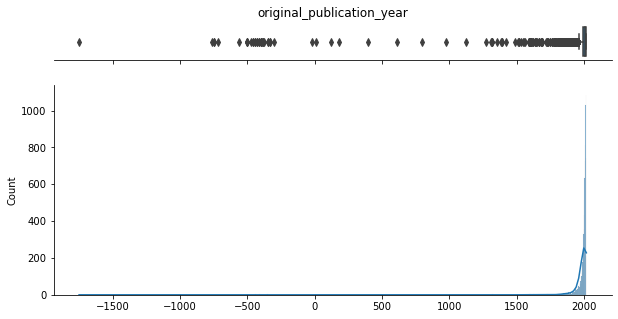

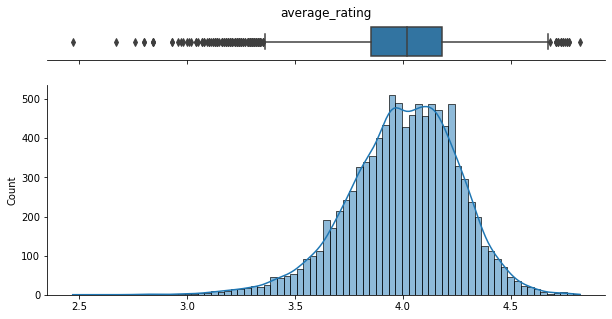

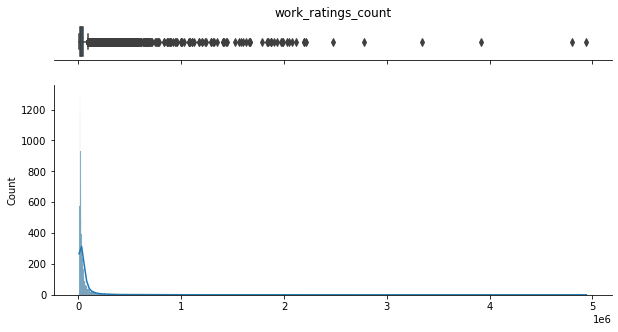

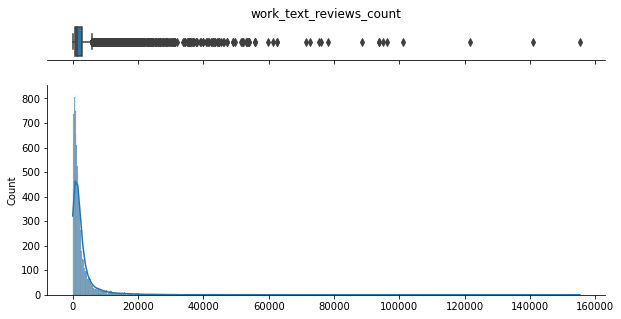

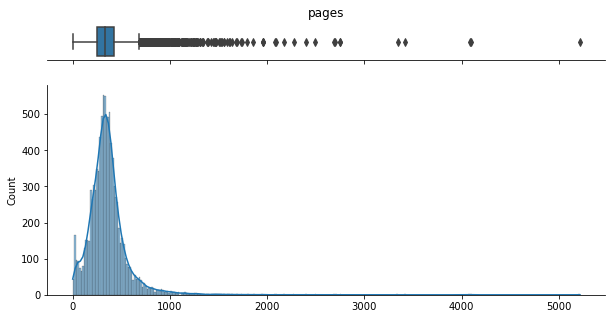

In [11]:
columns = ['original_publication_year', 'average_rating', 'work_ratings_count', 'work_text_reviews_count',
       'pages']

for c in columns: 
    fig, ax = plt.subplots(2, figsize=(10,5), sharex=True, gridspec_kw = {'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(x=df_orig_books[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.histplot(x=df_orig_books[c], ax=ax_hist, kde=True)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show

### Ratings

#### Columns, data types, and shape

In [12]:
#show shape and number of duplicates
print('Number of rows: %d' % df_orig_ratings.shape[0])
print('Number of columns: %d' % df_orig_ratings.shape[1])
print('Number of Duplicates: {}'.format(len(df_orig_ratings[df_orig_ratings.duplicated()])))

# Show data type, number of nulls and number of unique values for each column
dtype_list = []
null_list = []
nunique_list = []

for c in df_orig_ratings.columns:
    dtype_list.append(df_orig_ratings[c].dtypes)
    null_list.append(df_orig_ratings[c].isnull().sum())
    nunique_list.append(df_orig_ratings[c].nunique())
    
summary = pd.DataFrame(list(zip(df_orig_ratings.columns, dtype_list, null_list, nunique_list)),
                         columns = ['Column', 'Data Type', 'Number of Nulls', 'Number of Unique Values'])

summary

Number of rows: 5976479
Number of columns: 3
Number of Duplicates: 0


,Column,Data Type,Number of Nulls,Number of Unique Values
0,user_id,int64,0,53424
1,book_id,int64,0,10000
2,user_rating,int64,0,5


#### Summary statistics

In [13]:
df_orig_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,5976479.00,26224.46,15413.23,1.00,12813.00,25938.00,39509.00,53424.00
book_id,5976479.00,2006.48,2468.50,1.00,198.00,885.00,2973.00,10000.00
user_rating,5976479.00,3.92,0.99,1.00,3.00,4.00,5.00,5.00


#### Distributions / Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

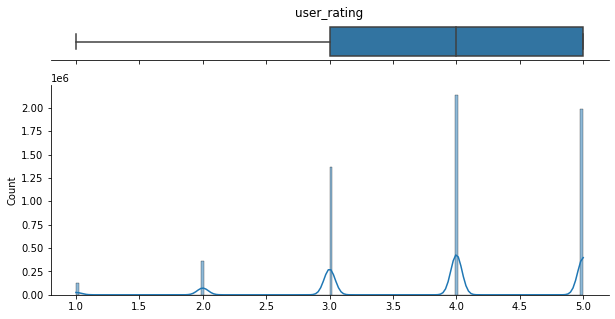

In [14]:
columns = ['user_rating']

for c in columns: 
    fig, ax = plt.subplots(2, figsize=(10,5), sharex=True, gridspec_kw = {'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(x=df_orig_ratings[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.histplot(x=df_orig_ratings[c], ax=ax_hist, kde=True)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show

## Data cleaning

In [15]:
df_clean_books = df_orig_books.copy()
df_clean_ratings = df_orig_ratings.copy()

### Drop unwanted columns

In [16]:
# ratings_count = count of ratings a book received
# work_ratings_count = count of all ratings all editions of the book received
# https://merlin.rebrovic.net/pub/mlnd-notebook.html/

dropped_col = ['Unnamed: 0', 'index', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'publishDate', 
               'ratings_count', 'original_title', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
               'image_url', 'small_image_url', 'authors_2']
df_clean_books = df_clean_books.drop(dropped_col, axis=1)

### Missing values

#### Publication year

In [17]:
df_clean_books[df_clean_books['original_publication_year'].isnull()][['goodreads_book_id', 'title']]

,goodreads_book_id,title
198,3609760,Twilight: The Complete Illustrated Movie Compa...
3249,856917,"Absolute Boyfriend, Vol. 1"
3881,8724779,Marked / Betrayed / Chosen / Untamed / Hunted ...
4252,9832370,BookRags Summary: A Storm of Swords
4303,5171894,"The Doomsday Key (Sigma Force, #6)"
4392,17733861,"A Shade of Blood (A Shade of Vampire, #2)"
5001,1044141,The 8th Habit: From Effectiveness to Greatness
5208,9748274,A Tale of Two Cities / Great Expectations
5648,48811,Nancy Drew: #1-64
7163,351023,"The Worst Witch (Worst Witch, #1)"


In [18]:
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 3609760, 'original_publication_year'] = 2008
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 90072, 'original_publication_year'] = 1996
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 856917, 'original_publication_year'] = 2003
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 36, 'original_publication_year'] = 2003
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 8724779, 'original_publication_year'] = 2009
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 349254, 'original_publication_year'] = 2003
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 9832370, 'original_publication_year'] = 2010
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 5171894, 'original_publication_year'] = 2009
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 17733861, 'original_publication_year'] = 2013
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 1044141, 'original_publication_year'] = 2004
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 9748274, 'original_publication_year'] = 1859
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 48811, 'original_publication_year'] = 2006
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 9528186, 'original_publication_year'] = 2010
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 809849, 'original_publication_year'] = 1982
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 765148, 'original_publication_year'] = 2001
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 197436, 'original_publication_year'] = 2000
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 351023, 'original_publication_year'] = 1974
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 11318, 'original_publication_year'] = 1939
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 6054190, 'original_publication_year'] = 2009
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 1056627, 'original_publication_year'] = 2007
df_clean_books.loc[df_clean_books['goodreads_book_id'] == 6614886, 'original_publication_year'] = 2009

### Clean up column values

#### In Series

In [19]:
#extract series name from title (between brackets)
df_clean_books['series'] = df_clean_books['title'].str.split('(').str[1]
df_clean_books['series'] = df_clean_books['series'].str.split(' #').str[0]
df_clean_books['series'] = df_clean_books['series'].str.replace(',', '')

In [20]:
#add column to identify if book belongs to series
df_clean_books['in_series'] = df_clean_books['series'].notnull()

Books which are part of a series tend to have a higher average rating than books which are not, and ratings rarely go below 3. This sounds logicial since a book with a low rating is not likely to have a continuation.

Text(0.5, 0, 'In series')

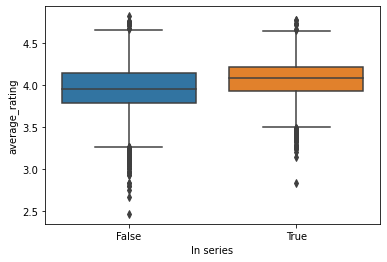

In [21]:
sns.boxplot(x='in_series', y='average_rating', data=df_clean_books)
#plt.xticks((0, 1), ('No', 'Yes'))
plt.xlabel('In series')

#### Genre

In [22]:
#clean up genre column to remove square brackets, open/close inverted commas and spaces
def clean_genre(column):
    new_text = []
    for c in column:
        c = c.replace("[", "") 
        c = c.replace("]", "")
        c = c.replace("'", "")
        c = c.replace(" ", "")
        new_text.append(c)
    
    return new_text

df_clean_books['genres'] = clean_genre(df_clean_books['genres'])

In [23]:
df_clean_books.head()

,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,pages,title,work_ratings_count,work_text_reviews_count,series,in_series
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"young-adult,fiction,fantasy,science-fiction,ro...",2767052,eng,2008.00,374.00,"The Hunger Games (The Hunger Games, #1)",4942365,155254,The Hunger Games,True
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"fantasy,fiction,young-adult,classics",3,eng,1997.00,309.00,Harry Potter and the Sorcerer's Stone (Harry P...,4800065,75867,Harry Potter,True
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"young-adult,fantasy,romance,fiction,paranormal",41865,eng,2005.00,501.00,"Twilight (Twilight, #1)",3916824,95009,Twilight,True
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"classics,fiction,historical-fiction,young-adult",2657,eng,1960.00,324.00,To Kill a Mockingbird,3340896,72586,NaN,False
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"classics,fiction,historical-fiction,romance",4671,eng,1925.00,200.00,The Great Gatsby,2773745,51992,NaN,False


#### Title

In [24]:
#extract titles with words that indicate a boxed set
boxsets = df_clean_books.loc[df_clean_books.title.str.contains('box set|boxed set|Boxed Set|Box Set|#1-|vol.set|#2-|volumes|complete collection|Complete Collection|Vol. Set|Complete Set|Vols|Volume Set|Books 1-|Ultimate Collection'),:]

In [25]:
#drop boxed sets as these are a repeat of individual books and will distort analysis on number of pages and author ratings
df_clean_books.drop(boxsets.index, inplace=True)

In [26]:
#remove series name from title
df_clean_books['title_clean'] = df_clean_books['title'].str.split('(').str[0]

#### Publication year

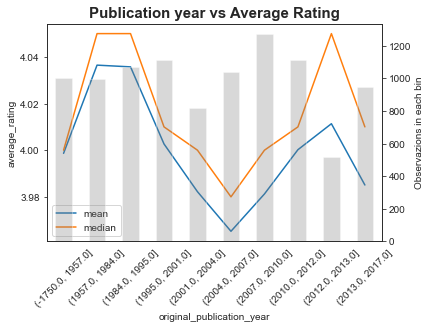

In [27]:
#bins are split by total number of rows
col = 'original_publication_year'
sns.set_style('white') 
breaks = np.quantile(df_clean_books[col], q=np.linspace(0, 1, 11))
groups = df_clean_books.groupby([pd.cut(df_clean_books[col], bins=breaks, duplicates='drop')])['average_rating'].agg(['mean','median','size'])
fig, ax = plt.subplots()
plt.title('Publication year vs Average Rating', weight='bold').set_fontsize('15')
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True, color="grey", alpha=0.3, grid=False)
ax.set(ylabel='average_rating')
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

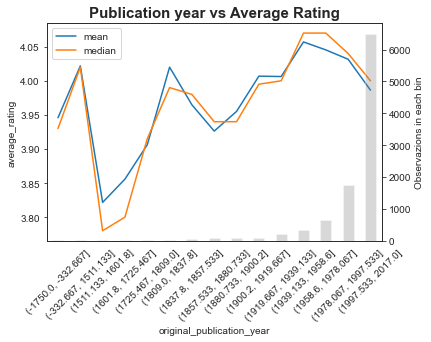

In [28]:
#bins are split by unique occurences of year
col = 'original_publication_year'
sns.set_style('white') 
breaks = np.quantile(df_clean_books[col].unique(), q=np.linspace(0, 1, 16))
groups = df_clean_books.groupby([pd.cut(df_clean_books[col], bins=breaks, duplicates='drop')])['average_rating'].agg(['mean','median','size'])
fig, ax = plt.subplots()
plt.title('Publication year vs Average Rating', weight='bold').set_fontsize('15')
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True, color="grey", alpha=0.3, grid=False)
ax.set(ylabel='average_rating')
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

In [29]:
#group years befo 1800 to 'Before 1800'
df_clean_books['original_publication_year'] = df_clean_books['original_publication_year'].apply(lambda x: 'before 1800' if x < 1800 else x)

#### Language code

In [30]:
df_clean_books['language_code'].value_counts()

eng    9586
ara      64
de       33
fre      25
ind      21
es       20
spa      20
fr       16
it       13
ger      13
nl        7
da        7
per       7
ro        7
jpn       7
sv        6
pl        6
pol       6
por       6
ms        3
nor       3
dan       3
mt        3
fil       2
ita       2
cs        2
vie       1
mul       1
fi        1
lt        1
rus       1
zh        1
no        1
id        1
rum       1
swe       1
is        1
tur       1
hu        1
et        1
Name: language_code, dtype: int64

In [31]:
#group language with <10 rows to 'other'
df_clean_books['language_code'] = df_clean_books['language_code'].apply(lambda x: 'other' if df_clean_books['language_code'].value_counts()[x] < 10 else x)

#### Author

In [32]:
df_clean_books['authors'].value_counts()

['Stephen King']                      58
['Nora Roberts']                      46
['Terry Pratchett']                   40
['Agatha Christie']                   38
['Dean Koontz']                       34
                                      ..
['Beth Fantaskey']                     1
['Caitlin Doughty']                    1
['Joe Hill', 'Christopher Golden']     1
['Grace Lin']                          1
['[John Keegan]']                      1
Name: authors, Length: 5040, dtype: int64

In [33]:
def clean_text(column):
    new_text = []
    for c in column:
        c = c.replace("['", "") 
        c = c.replace("']", "")
        c = c.replace("]", "")
        c = c.replace("[", "")
        c = c.split("', '")[0]
        new_text.append(c)
    
    return new_text

df_clean_books['keyauthor'] = clean_text(df_clean_books['authors'])

In [34]:
df_clean_books.head()

,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,pages,title,work_ratings_count,work_text_reviews_count,series,in_series,title_clean,keyauthor
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"young-adult,fiction,fantasy,science-fiction,ro...",2767052,eng,2008.00,374.00,"The Hunger Games (The Hunger Games, #1)",4942365,155254,The Hunger Games,True,The Hunger Games,Suzanne Collins
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"fantasy,fiction,young-adult,classics",3,eng,1997.00,309.00,Harry Potter and the Sorcerer's Stone (Harry P...,4800065,75867,Harry Potter,True,Harry Potter and the Sorcerer's Stone,J.K. Rowling
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"young-adult,fantasy,romance,fiction,paranormal",41865,eng,2005.00,501.00,"Twilight (Twilight, #1)",3916824,95009,Twilight,True,Twilight,Stephenie Meyer
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"classics,fiction,historical-fiction,young-adult",2657,eng,1960.00,324.00,To Kill a Mockingbird,3340896,72586,NaN,False,To Kill a Mockingbird,Harper Lee
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"classics,fiction,historical-fiction,romance",4671,eng,1925.00,200.00,The Great Gatsby,2773745,51992,NaN,False,The Great Gatsby,F. Scott Fitzgerald


## EDA

In [35]:
df_books = df_clean_books.copy()
df_ratings = df_clean_ratings.copy()

### Series

Books which are part of a series tend to have a higher average rating than books which are not, and ratings rarely go below 3. This sounds logicial since a book with a low rating is not likely to have a continuation.

Text(0.5, 0, 'In series')

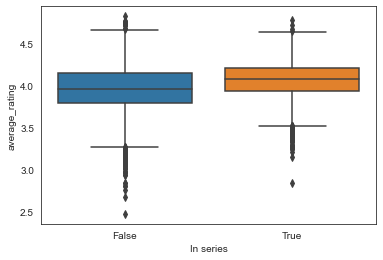

In [36]:
sns.boxplot(x='in_series', y='average_rating', data=df_books)
#plt.xticks((0, 1), ('No', 'Yes'))
plt.xlabel('In series')

### Pages

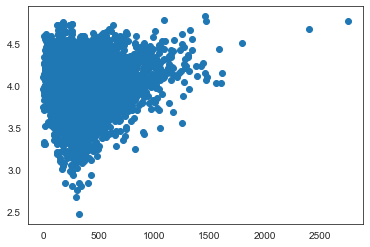

In [37]:
plt.scatter(x='pages', y='average_rating', data=df_books)

### What influences a book's rating?
Correlations are rather small , which indicate that there are no strong relationships between average rating and other features like number of ratings or number of reviews. This could mean that the rating could depend on other features like writing style or strength of plot.

<AxesSubplot:>

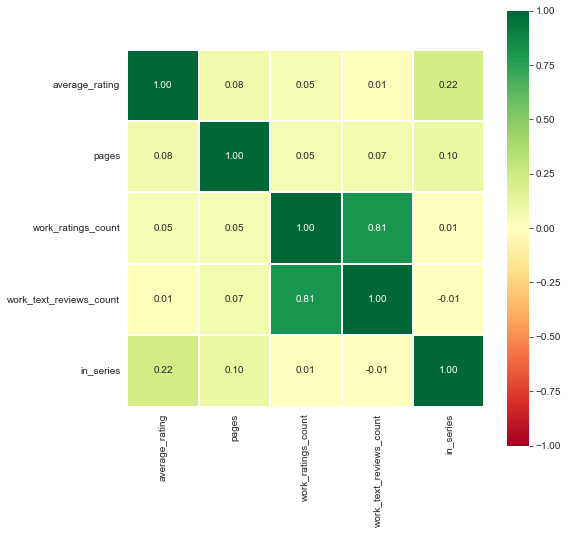

In [38]:
to_drop = ['book_id', 'goodreads_book_id']
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(df_books.drop(to_drop, axis=1).corr(), dtype=bool))
sns.heatmap(df_books.drop(to_drop, axis=1).corr(),
            cmap='RdYlGn', fmt='.2f', vmax=1.0, vmin=-1.0, linewidth=0.1, annot=True, annot_kws={"size": 10}, square=True)

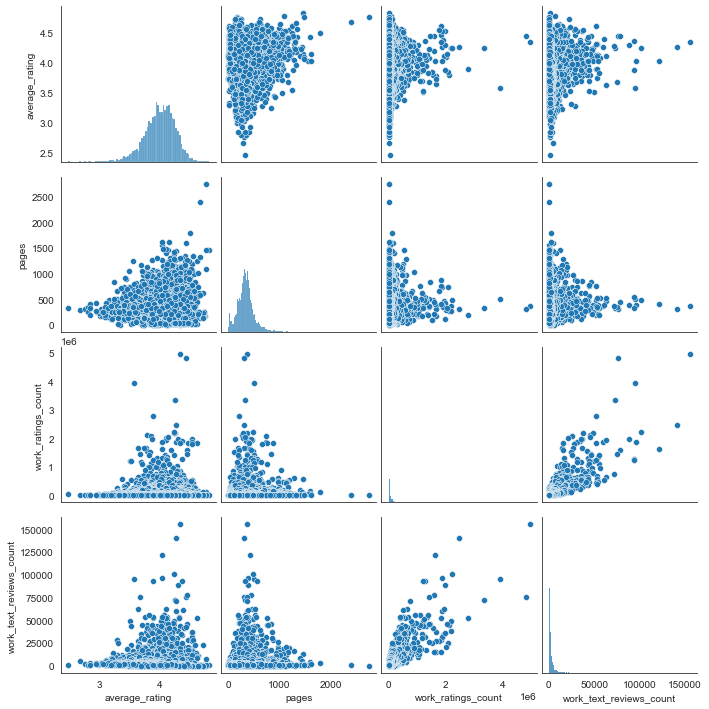

In [39]:
to_drop = ['book_id', 'goodreads_book_id']

sns.pairplot(df_books.select_dtypes(include = ['number']).drop(to_drop, axis=1))

### Top 10 books with highest average rating

In [40]:
df_books.sort_values('average_rating', ascending = False).loc[:, ('title','average_rating', 'work_ratings_count')].head(10).set_index('title')

,average_rating,work_ratings_count
title,,
The Complete Calvin and Hobbes,4.82,29968
"Words of Radiance (The Stormlight Archive, #2)",4.77,108176
ESV Study Bible,4.76,10784
Mark of the Lion Trilogy,4.76,9547
It's a Magical World: A Calvin and Hobbes Collection,4.75,23429
There's Treasure Everywhere: A Calvin and Hobbes Collection,4.74,17285
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.73,18198
The Indispensable Calvin and Hobbes,4.73,16911
"A Court of Mist and Fury (A Court of Thorns and Roses, #2)",4.72,126491


### Top 10 books with highest rating count

In [41]:
df_books.sort_values('work_ratings_count', ascending = False).loc[:, ('title','work_ratings_count', 'average_rating')].head(10).set_index('title')

,work_ratings_count,average_rating
title,,
"The Hunger Games (The Hunger Games, #1)",4942365,4.34
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4800065,4.44
"Twilight (Twilight, #1)",3916824,3.57
To Kill a Mockingbird,3340896,4.25
The Great Gatsby,2773745,3.89
The Fault in Our Stars,2478609,4.26
"Divergent (Divergent, #1)",2216814,4.24
The Hobbit,2196809,4.25
Pride and Prejudice,2191465,4.24


### Top 10 books with highest review count

In [42]:
df_books.sort_values('work_text_reviews_count', ascending = False).loc[:, ('title', 'work_text_reviews_count', 'work_ratings_count', 'average_rating')].head(10).set_index('title')

,work_text_reviews_count,work_ratings_count,average_rating
title,,,
"The Hunger Games (The Hunger Games, #1)",155254,4942365,4.34
The Fault in Our Stars,140739,2478609,4.26
Gone Girl,121614,1626519,4.03
"Divergent (Divergent, #1)",101023,2216814,4.24
"Mockingjay (The Hunger Games, #3)",96274,1870748,4.03
"Twilight (Twilight, #1)",95009,3916824,3.57
The Book Thief,93611,1287798,4.36
The Girl on the Train,93600,1226485,3.88
"Catching Fire (The Hunger Games, #2)",88538,1988079,4.30


#### Top 10 authors with highest average rating

Text(0, 0.5, '')

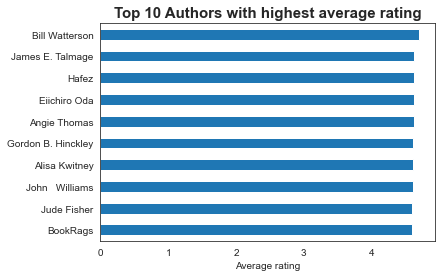

In [43]:
auth = df_books.groupby('keyauthor')['average_rating'].mean().sort_values().tail(10)
auth.plot(kind='barh')
plt.xlabel('Average rating')
plt.title('Top 10 Authors with highest average rating', fontsize=15, weight='bold')
plt.ylabel('')

### Top 10 authors with highest rating count

Text(0, 0.5, '')

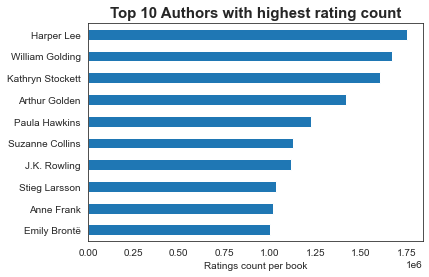

In [44]:
auth = df_books.groupby('keyauthor')['work_ratings_count'].mean().sort_values().tail(10)
auth.plot(kind='barh')
plt.xlabel('Ratings count per book')
plt.title('Top 10 Authors with highest rating count', fontsize=15, weight='bold')
plt.ylabel('')

### Top 10 authors with highest review count

Text(0, 0.5, '')

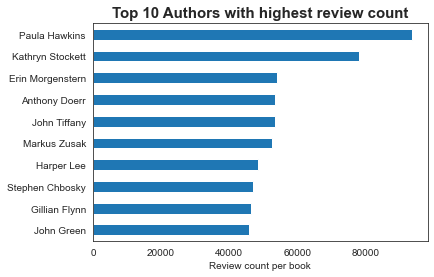

In [45]:
auth = df_books.groupby('keyauthor')['work_text_reviews_count'].mean().sort_values().tail(10)
auth.plot(kind='barh')
plt.xlabel('Review count per book')
plt.title('Top 10 Authors with highest review count', fontsize=15, weight='bold')
plt.ylabel('')

### Genre

In [46]:
#split each genre to a separate row

df_genre = df_books[['title_clean', 'keyauthor', 'description', 'work_ratings_count', 'average_rating', 'genres']]
df_genre['genres'] = df_genre['genres'].str.split(',') #change column to list type
df_genre = df_genre.explode('genres') #split each genre into separate rows
df_genre.drop(df_genre[(df_genre['genres'] == 'books')].index, inplace=True)
df_genre.head()

C:\Users\AMANDA~1\AppData\Local\Temp/ipykernel_18388/1422149745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['genres'] = df_genre['genres'].str.split(',') #change column to list type


,title_clean,keyauthor,description,work_ratings_count,average_rating,genres
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4942365,4.34,young-adult
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4942365,4.34,fiction
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4942365,4.34,fantasy
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4942365,4.34,science-fiction
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4942365,4.34,romance


In [47]:
df_genre['genres'].value_counts()

fiction               7565
fantasy               3396
romance               3060
contemporary          2598
young-adult           2518
mystery               2176
classics              1952
historical-fiction    1679
thriller              1553
nonfiction            1491
crime                 1265
science-fiction       1232
suspense              1212
paranormal            1188
chick-lit             1150
horror                 762
history                754
biography              739
memoir                 601
philosophy             558
graphic-novels         449
psychology             434
religion               430
comics                 425
self-help              379
science                351
spirituality           299
christian              272
poetry                 256
business               245
art                    205
travel                 182
manga                  143
music                  133
sports                 121
cookbooks               66
humor-and-comedy         3
N

In [48]:
#group genres with <100 rows to 'Other'
df_genre['genres'] = df_genre['genres'].apply(lambda x: 'other' if df_genre['genres'].value_counts()[x] < 100 else x)

Text(0, 0.5, '')

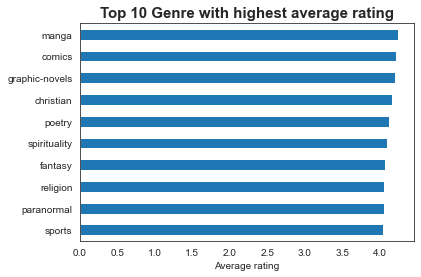

In [49]:
genre = df_genre.groupby('genres')['average_rating'].mean().sort_values().tail(10)
genre.plot(kind='barh')
plt.xlabel('Average rating')
plt.title('Top 10 Genre with highest average rating', fontsize=15, weight='bold')
plt.ylabel('')

Text(0, 0.5, '')

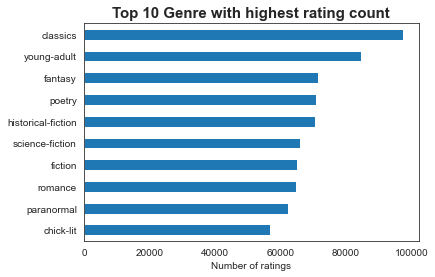

In [50]:
genre = df_genre.groupby('genres')['work_ratings_count'].mean().sort_values().tail(10)
genre.plot(kind='barh')
plt.xlabel('Number of ratings')
plt.title('Top 10 Genre with highest rating count', fontsize=15, weight='bold')
plt.ylabel('')

### Users

#### Distributions

Text(0.5, 1.0, 'Distribution of Ratings')

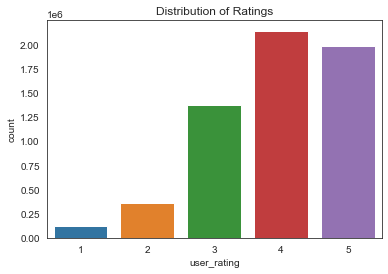

In [51]:
sns.countplot(x='user_rating', data=df_ratings)
plt.title('Distribution of Ratings')

Text(0.5, 1.0, 'Average rating by book')

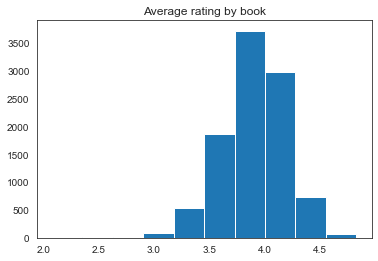

In [52]:
plt.hist(df_ratings.groupby('book_id')['user_rating'].mean())
plt.title('Average rating by book')

Text(0.5, 1.0, 'Average rating by user')

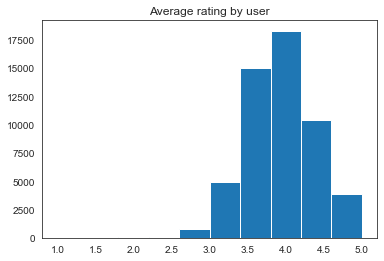

In [53]:
plt.hist(df_ratings.groupby('user_id')['user_rating'].mean())
plt.title('Average rating by user')

#### Do number of ratings affect average rating for a book?
It looks like this does not impact books with very few ratings, however books with many ratings are usually rated at least a 3

Text(0, 0.5, 'Avg rating per book')

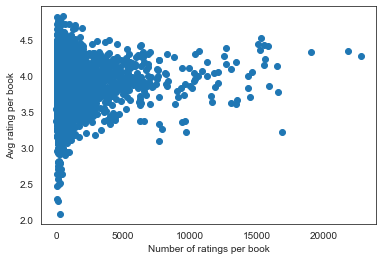

In [54]:
#number of ratings and average rating for each book
agg = {'user_id': 'count',
       'user_rating': 'mean'}

tmp = df_ratings.groupby(by='book_id').agg(agg)
plt.scatter(x='user_id', y='user_rating', data=tmp)
plt.xlabel('Number of ratings per book')
plt.ylabel('Avg rating per book')

#### Do frequent raters rate differently?
There is no pattern between number of books a user rates, and the average rating for the user.

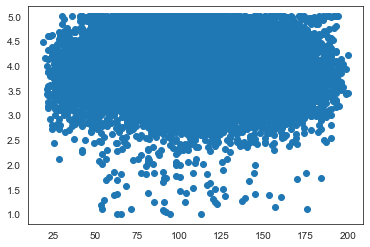

In [55]:
#number of ratings and average rating for each user
agg = {'book_id': 'count',
       'user_rating': 'mean'}

tmp = df_ratings.groupby(by='user_id').agg(agg)
plt.scatter(x='book_id', y='user_rating', data=tmp)

## Export to CSV

In [56]:
df_books.to_csv('df_books.csv', index = False)
df_ratings.to_csv('df_ratings.csv', index = False)